# Data Analysis 
## Link to data: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

In [1]:
# Import packages
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pprint import pprint
from pickle import dump
from random import sample as r_sample

# Pandas df print formating
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 75)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Load data

In [2]:
raw_data = pd.read_csv('raw_data.csv')

## View and explore data

In [3]:
pprint(raw_data.columns.values.tolist())

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

### Check for nan values

In [4]:
raw_data.isnull().values.any()

False

### Check max values

In [5]:
raw_data.max()

Bankrupt?                                                   1.000e+00
 ROA(C) before interest and depreciation before interest    1.000e+00
 ROA(A) before interest and % after tax                     1.000e+00
 ROA(B) before interest and depreciation after tax          1.000e+00
 Operating Gross Margin                                     1.000e+00
 Realized Sales Gross Margin                                1.000e+00
 Operating Profit Rate                                      1.000e+00
 Pre-tax net Interest Rate                                  1.000e+00
 After-tax net Interest Rate                                1.000e+00
 Non-industry income and expenditure/revenue                1.000e+00
 Continuous interest rate (after tax)                       1.000e+00
 Operating Expense Rate                                     9.990e+09
 Research and development expense rate                      9.980e+09
 Cash flow rate                                             1.000e+00
 Interest-bearing de

### Check min values

In [6]:
raw_data.min()

Bankrupt?                                                   0.0
 ROA(C) before interest and depreciation before interest    0.0
 ROA(A) before interest and % after tax                     0.0
 ROA(B) before interest and depreciation after tax          0.0
 Operating Gross Margin                                     0.0
 Realized Sales Gross Margin                                0.0
 Operating Profit Rate                                      0.0
 Pre-tax net Interest Rate                                  0.0
 After-tax net Interest Rate                                0.0
 Non-industry income and expenditure/revenue                0.0
 Continuous interest rate (after tax)                       0.0
 Operating Expense Rate                                     0.0
 Research and development expense rate                      0.0
 Cash flow rate                                             0.0
 Interest-bearing debt interest rate                        0.0
 Tax rate (A)                           

### Plot hist of target values of bankrupcty

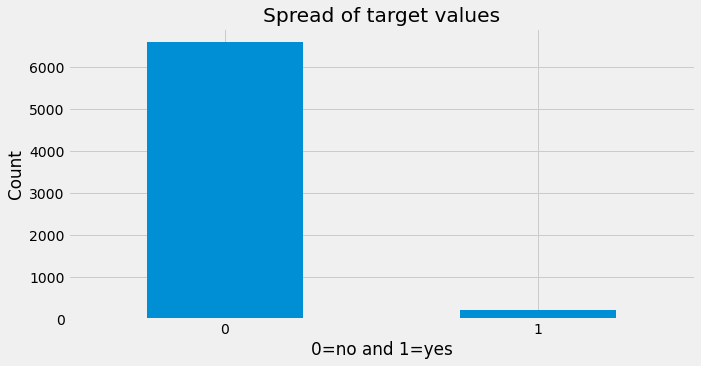

In [7]:
dist_y_plot = raw_data["Bankrupt?"].value_counts().plot(kind='bar',rot=0)
plt.title("Spread of target values")
plt.ylabel("Count")
plt.xlabel("0=no and 1=yes")
plt.show(dist_y_plot)

## Split into Train and Val

In [8]:
col_names = raw_data.columns
X, y = pd.DataFrame(raw_data.iloc[:,1:]), pd.DataFrame(raw_data.iloc[:,0])
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (6819, 95)
y shape: (6819, 1)


In [9]:
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.371,0.424,0.406,0.601,0.601,0.999,0.797,0.809,0.303,0.781,1.257e-04,0.000e+00,0.458,7.251e-04,0.0,0.148,0.148,0.148,0.169,0.312,0.018,0.096,0.139,0.022,0.848,0.689,0.689,0.218,4.980e+09,3.270e-04,0.263,0.364,0.002,0.001,0.630,0.021,0.208,0.792,0.005,0.390,0.006,0.096,0.138,0.398,0.087,0.002,0.003,1.821e-04,1.165e-04,0.033,0.034,0.393,0.037,0.673,0.167,0.191,4.094e-03,0.002,1.473e-04,0.147,0.334,0.277,0.001,0.676,0.721,0.339,0.026,0.903,0.002,0.065,7.010e+08,6.550e+09,0.594,4.580e+08,0.672,0.424,0.676,0.339,0.127,0.638,0.459,0.520,0.313,0.118,0,0.717,0.009,0.623,0.601,0.828,0.290,0.027,0.564,1,0.016
1,0.464,0.538,0.517,0.610,0.610,0.999,0.797,0.809,0.304,0.782,2.898e-04,0.000e+00,0.462,6.471e-04,0.0,0.182,0.182,0.182,0.209,0.318,0.021,0.094,0.170,0.022,0.848,0.690,0.690,0.218,6.110e+09,4.430e-04,0.265,0.377,0.006,0.004,0.635,0.013,0.171,0.829,0.005,0.377,0.006,0.094,0.169,0.398,0.064,0.001,0.005,9.360e+09,7.190e+08,0.025,0.007,0.392,0.012,0.751,0.127,0.182,1.495e-02,0.004,1.384e-03,0.057,0.341,0.290,0.005,0.309,0.732,0.330,0.024,0.931,0.002,0.026,1.065e-04,7.700e+09,0.594,2.490e+09,0.672,0.469,0.309,0.330,0.121,0.641,0.459,0.567,0.314,0.048,0,0.795,0.008,0.624,0.610,0.840,0.284,0.265,0.570,1,0.021
2,0.426,0.499,0.472,0.601,0.601,0.999,0.796,0.808,0.302,0.780,2.361e-04,2.550e+07,0.459,7.901e-04,0.0,0.178,0.178,0.194,0.1

In [10]:
y.head()

,Bankrupt?
0,1
1,1
2,1
3,1
4,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)
print("Number of train samples: {}".format(len(y_train)))
print("Number of test samples: {}".format(len(y_test)))
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_test shape: {}".format(y_test.shape))

Number of train samples: 4773
Number of test samples: 2046
X_train shape: (4773, 95)
y_train shape: (4773, 1)
X_test shape: (2046, 95)
X_test shape: (2046, 1)


## Scale input data 

In [12]:
# Declare scaler object
scaler = MinMaxScaler()

# Scale w.r.t train data 
scaler.fit(X_train)

# Scale train 
X_train = scaler.transform(X_train) 

# Scale test 
X_test = scaler.transform(X_test) 

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

"""
# load the scaler
scaler = load(open('scaler.pkl', 'rb'))
"""

"\n# load the scaler\nscaler = load(open('scaler.pkl', 'rb'))\n"

## Save new data 

In [13]:
pd.DataFrame(X_train,columns=col_names[1:]).to_csv("X_train.csv",index=False)
pd.DataFrame(X_test,columns=col_names[1:]).to_csv("X_test.csv",index=False)
pd.DataFrame(y_train,columns=[col_names[0]]).to_csv("y_train.csv",index=False)
pd.DataFrame(y_test,columns=[col_names[0]]).to_csv("y_test.csv",index=False)